In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

/Users/B/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [31]:
data = pd.read_csv(filepath_or_buffer="./data_to_ryan.csv")

In [33]:
# Group first by the event, and then by the year
data_grouped = data.groupby(["Event", "Year"])
# Sum up values in each group. Note that this will sum everything, including things that don't make sense
# like age, order numbers, etc. If you want to plot them grouped in some way, you'll need to group and aggregate them 
# separately
data_aggregated = data_grouped.sum()
# Drop all the columns you don't need
data_aggregated = data_aggregated.drop(["Order #", "Eventbrite Payment Processing", "Age", "shirt size", "Billing Address 2"], axis=1)
data_aggregated

Quantity
Event   Year          
Cider   2015         3
FCBF    2013         6
        2014         4
        2015         1
        2016         4
Poutine 2013         4
        2016         3

In [39]:
# Next we have to flatten the data structure to make it suitable for plotting
data_flat = data_aggregated.reset_index()
data_flat

,Event,Year,Quantity
0,Cider,2015,3
1,FCBF,2013,6
2,FCBF,2014,4
3,FCBF,2015,1
4,FCBF,2016,4
5,Poutine,2013,4
6,Poutine,2016,3


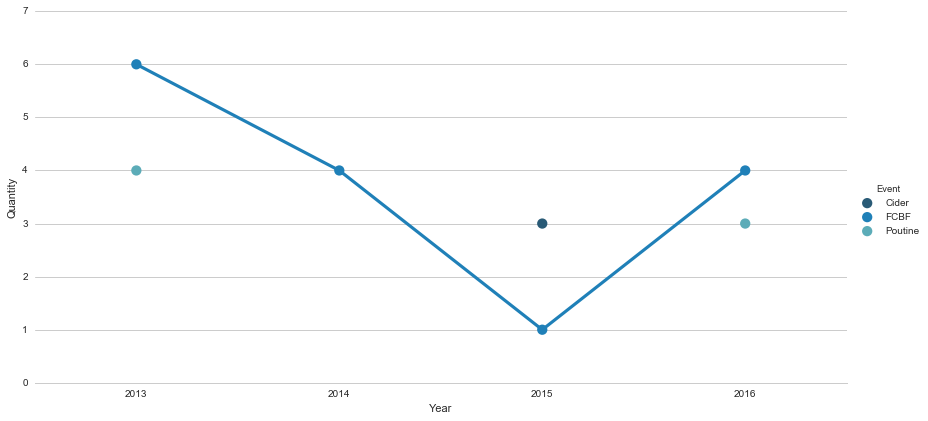

In [40]:
# Set the seaborn style
sns.set(style="whitegrid")

# Draw a plot with separate lines for 
g = sns.factorplot(data=data_flat, x="Year", y="Quantity", hue="Event", palette="YlGnBu_d", size=6, aspect=2, ci=None)
g.despine(left=True)